# Data Classification Using Convolutional Neural Networks (CNN)

# Background

In this era, types of data are becoming more varied. Demand for processing raw voice data is increasing due to increased demand for sentiment analysis for improving services. This analysis can be used for example at customer services, finding music title, or improving sales through call centers. 

From these problems we will use audio data for creating machine learning model and one of the most popular and good method for working with unstructured data is using Convolutional Neural Network (CNN).

This material aims to provide an understanding for the workshop participants to classify audio data using Convolutional Neural Network (CNN). One Instructor and two Teaching Assistants will help participants troubleshoot or help with any difficulties encountered.

# Neural Network

A neural network, or artificial neural network (ANN), is a machine learning method inspired by how the human brain transmits information through the nervous system (biological neural network). There are two main components of a neural network: architecture and the learning process.

## Neural Network Architecture

The human nervous system consists of nerve cells called neurons, which are numerous and interconnected to form a network. Every stimulus/input from the environment is received by sensory organs as signals and then transmitted through neurons from one nerve cell to another.
    
> This neural network extends from the fingertips to the brain and back to the entire body. Information flows from the stimulus/input area, is processed in the brain, and then returned to the body as an output or response

Human Neuron  |  Artificial Neural Network's Neuron
-- | --
![neuron](assets/bnn.png) | ![neuron](assets/ann.PNG)

This neural system architecture is what inspired the development of neural network models.

## Understanding How Neural Network Works

![nn works](assets/nn_works.png)

![neuron](assets/ann.PNG)
💡 In a neural network, information is transmitted and processed through an architecture consisting of:

* **neuron/node**: The place where information is stored.
* **input layer**: The first layer that receives input; the number of nodes corresponds to the number of input/predictor variables (x₁, x₂, ..., xₙ).
* **hidden layer**: The intermediate layer between input and output where information is processed. The number of hidden layers can be more than one, and it is determined by the user.
* **output layer**: The final layer that produces the output (prediction result); the number of nodes corresponds to the number of target variables (y).
- _**weight**_: The information carried by each neuron. Initially, these weights are randomly initialized.


## Multi Layer Perceptron

As the name suggests, the architecture of an artificial neural network (ANN) consists of interconnected neurons and is composed of three types of layers:
1. Input Layer
2. Hidden Layer
3. Output Layer

Since this architecture is formed by multiple layers of perceptrons, it is sometimes referred to as a multi-layer perceptron (MLP). The term deep learning originally emerged when neural networks had multiple hidden layers, forming a deeper structure.

![image](assets/nn.png)

Below is a reference for the differences between these two architectures:

| **Architecture**            | **Description** |
|-----------------------------|---------------|
| **Multi-Layer Perceptron (MLP)** | A neural network with one or more hidden layers but not necessarily "deep." |
| **Deep Learning (Deep Neural Network)** | A neural network with many hidden layers, allowing for more complex pattern recognition. |


# Introduction to Audio Data

Audio is a form of wave that produces sound. In humans, sound is generated by the vibration of the **vocal cords**, located at the base of the throat within the larynx (Adam’s apple). When the vocal cords come together and air from the lungs passes through them, vibrations occur, producing sound. Similarly, inanimate objects can also produce sound through vibrations, following the same principle as human vocalization. These vibrations cause oscillations in air molecules, creating alternating air pressure that forms sound waves.  

Sound waves that propagate through the air can be **digitally recorded**, making them one of the forms of **unstructured data** that we work with. Sound waves have several attributes that define pitch, volume, and other characteristics. Some key attributes include:  
- **Frequency:** Determines the pitch of the sound (high or low tones).  
- **Amplitude:** Determines the loudness of the sound.  
- **Wavelength (Lambda, λ):** The distance between successive peaks in a wave.  

Information in audio data is stored within these attributes.  

## Raw Shape of Audio Data

To read audio data in **Python**, we need an additional library called **Librosa**. Extracting data using **Librosa** will generate a **waveform**, which represents the sound wave visually.

In [10]:
# Library Tensorflow
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

In [11]:
import numpy as np # library untuk pengolahan data angka
import matplotlib.pyplot as plt # library dasar visualisasi 
import librosa # library khusus analisa data audio
import librosa.display # library visualisasi data audio, dibangun dari matplotlib
import IPython.display as ipd # library to show audio

### Reading Audio Files  

The first step in processing audio data is **reading the audio file**. To accomplish this, we use the `.load()` function from the **Librosa** library. This function requires two main parameters:  

- **path:** The location of the audio file.  

In addition to reading the audio data, this function also returns the **sample rate**. The **sample rate** represents the number of audio samples per second (frequency). The default value used is **22050 Hz**, which corresponds to the highest frequency range still audible to humans.


In [13]:
file_path = "data_input/genres_train/blues/blues.00050.wav"

signal, sample_rate = librosa.load(path = file_path)
ipd.Audio(file_path)

In [14]:
print(signal)
print(sample_rate)

[0.06652832 0.09335327 0.04510498 ... 0.08078003 0.06115723 0.04190063]
22050


### Visualizing Audio Data  

From the `signal` variable obtained earlier, we can observe that the extracted data consists of a sequence of numerical values. To better understand the shape of this data, we can visualize it using the `waveplot()` function from the **librosa.display** package.


Text(0.5, 1.0, 'Gelombang Suara')

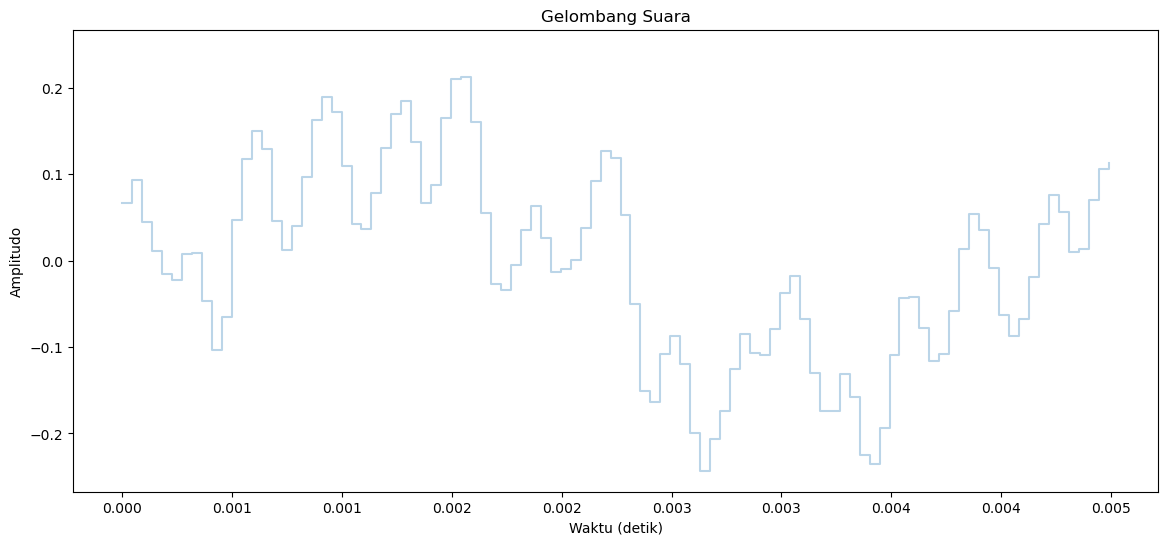

In [16]:
plt.figure(figsize=(14,6))
librosa.display.waveshow(y=signal[0:100], # data audio
                         sr=sample_rate, # sample rate
                         alpha=0.3) # ketebalan visual
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")
plt.title("Gelombang Suara")

### Transforming Audio Data: Time Domain to Frequency Domain  

From the extracted audio data above, we have limited information. To gain deeper insights, we need to **convert the data from the time domain to the frequency domain** using the **Fast Fourier Transform (FFT)**.  

In simple terms, **FFT** decomposes a signal into its individual frequency components, allowing us to analyze its spectral properties. The process of FFT transformation is illustrated in the following image:

![fft](assets/fft.jpg)

In [18]:
# menghitung nilai fft
fft = np.fft.fft(signal)

In [19]:
fft

array([-25.05200195+3.19744231e-14j,  -0.8931063 -6.94886698e-02j,
        -0.71576594+2.63302574e-01j, ...,  -0.3971927 +2.63600123e-01j,
        -0.71576594-2.63302574e-01j,  -0.8931063 +6.94886698e-02j])

If we inspect the values obtained from the **FFT**, we will see that they are **complex numbers**. To make these values interpretable as **magnitude or power**, we need to convert them by computing their **absolute values**.

In [21]:
# menghitung nilai hasil fft untuk mendapatkan magnitudo
spectrum = np.abs(fft)
spectrum

array([25.05200195,  0.89580553,  0.76265925, ...,  0.47670438,
        0.76265925,  0.89580553])

Text(0.5, 1.0, 'Power spectrum')

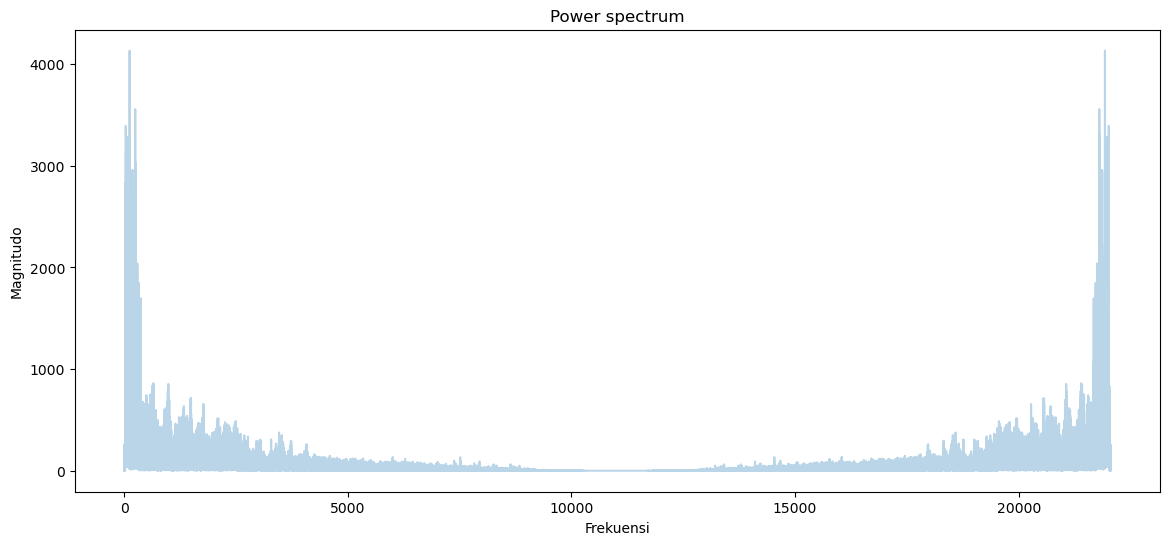

In [22]:
# membuat bin untuk frekuensi
freq = np.linspace(0, sample_rate, len(spectrum))

# plot visualisasi
plt.figure(figsize=(14,6))
plt.plot(freq, spectrum, alpha=0.3)
plt.xlabel("Frekuensi")
plt.ylabel("Magnitudo")
plt.title("Power spectrum")

>The visualization of the **FFT output** is typically **symmetrical**, with a midpoint at **half of the total spectrum data**. To eliminate redundant information, we only need to take the **first half** of the spectrum. This can be achieved using the following approach:

Text(0.5, 1.0, 'Power spectrum')

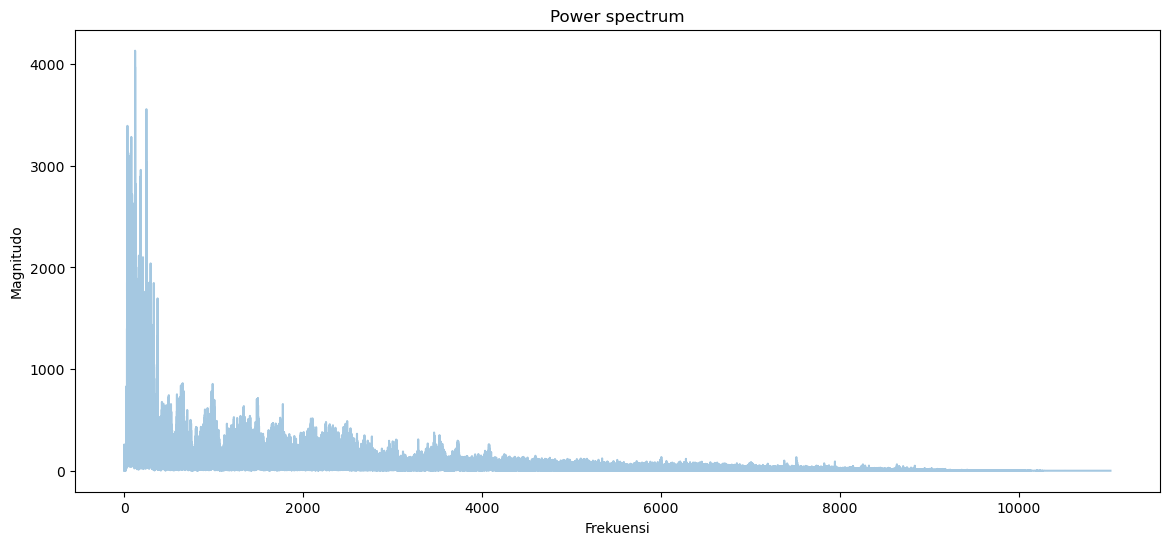

In [24]:
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_freq = freq[:int(len(spectrum)/2)]

# plot spectrum
plt.figure(figsize=(14,6))
plt.plot(left_freq, left_spectrum, alpha=0.4)
plt.xlabel("Frekuensi")
plt.ylabel("Magnitudo")
plt.title("Power spectrum")

The result we obtained above represents **sound waves in the frequency domain**. This visualization captures all frequencies over the **entire duration** of the audio data, essentially creating a **snapshot** of the full signal.  

However, in real-world audio data, frequencies change over time. To preserve this **time-dependent information**, we use the **Short-Time Fourier Transform (STFT)**. Unlike a regular **FFT**, STFT **segments** the audio into smaller windows, applying **FFT** to each segment, allowing us to retain temporal information.  

In STFT, we need to define two additional parameters:  
- **hop_length:** Determines the step size (or overlap) between successive FFT computations.  
- **n_fft:** Specifies the number of data points used for each FFT computation.  

The following illustration explains both parameters:
![hop-nfft](assets/nfft-hoplength.png)

In [26]:
# STFT -> spectrogram
hop_length = 512 # hop of each fft
n_fft = 2048 # total sample per fft window

# perform stft
stft = librosa.stft(y=signal, n_fft=n_fft, hop_length=hop_length)

# calculate absolute values on complex numbers to get magnitude
spectrogram = np.abs(stft)

### Visualizing STFT with a Spectrogram  

The **STFT** visualization is represented as a **spectrogram**, which is a diagram that displays wave information over short time intervals. A **spectrogram** provides a way to observe how frequencies evolve over time, making it useful for analyzing audio signals.  

To generate a spectrogram, we use the `specshow()` function from **librosa.display**.

Text(0.5, 1.0, 'Spectrogram (amplitudo)')

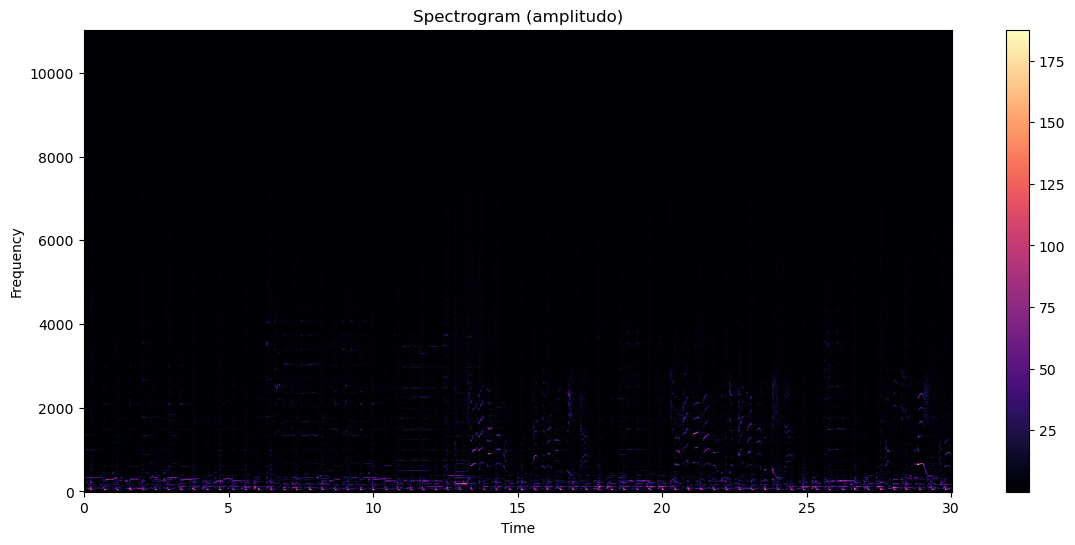

In [28]:
# display spectrogram
plt.figure(figsize=(14,6))
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length, y_axis = 'fft', x_axis = 'time')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram (amplitudo)")

Text(0.5, 1.0, 'Spectrogram (dB)')

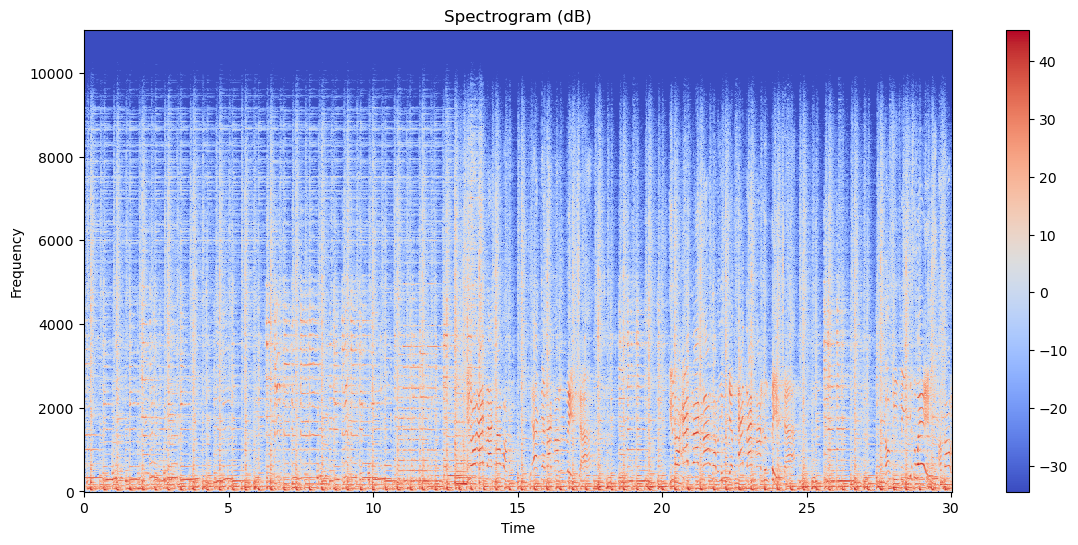

In [29]:
# apply logarithm to convert amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(14,6))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length, y_axis = 'fft', x_axis = 'time')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram (dB)")

### Extracting Features with Mel Frequency Cepstral Coefficients (MFCC)  

To extract meaningful features from audio, we use **Mel Frequency Cepstral Coefficients (MFCC)**. MFCC transforms audio signals into numerical values while considering how humans perceive sound quality. This feature extraction method is widely used in speech and audio recognition tasks.  

To obtain MFCC values, we use the `mfcc()` function from **librosa.feature**, with the following parameters:  

- **signal:** Extracted audio data from the initial processing.  
- **sample_rate:** Number of audio samples per second.  
- **n_fft:** Number of data points per FFT window.  
- **hop_length:** Step size between successive FFT computations.  
- **n_mfcc:** Number of MFCC coefficients to extract (typically **13**, but can be up to **40**).  

All these parameters are based on concepts we have previously covered.  

![mfcc](assets/MFCC.png)


In [31]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

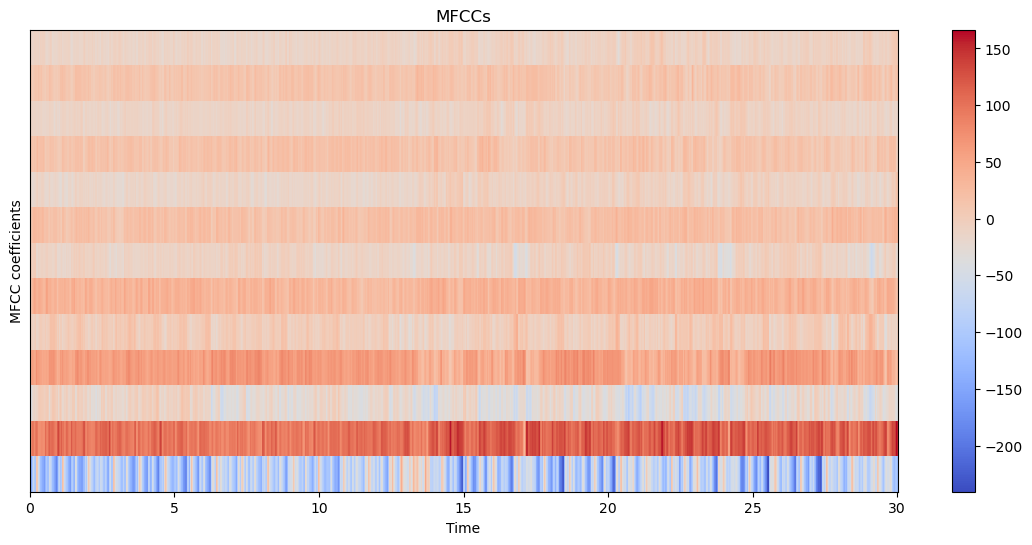

In [32]:
# display MFCCs
plt.figure(figsize=(14,6))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length, x_axis = 'time')
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()

___
# Implementing Neural Networks for Audio Data  

In the previous section, we implemented a **neural network** for a linear case. Now, we will apply a **neural network** to an **audio dataset**. The steps involved in this process are:  

1. **Data Preparation**  
2. **Building the Neural Network Architecture**  
3. **Training the Model**  

## Data Preparation  

The **MFCC coefficients** obtained earlier will be used as features for training the neural network. Therefore, we need to prepare a function that converts our entire dataset into **MFCC coefficients**.  

The `save_mfcc()` function is designed to handle this conversion. The steps performed by this function include:  

- Accessing the folder where the audio data is stored.  
- Reading each file one by one.  
- Loading each audio file.  
- Segmenting the data for **data augmentation** purposes.  
- Storing the extracted MFCC values in a dictionary.  
- Saving the dictionary as a **.json** file.  


In [34]:
import os
import json
import math
import librosa
import numpy as np

def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=10, sr=22050, file_duration=30):
    """Extracts MFCCs from a music dataset and saves them into a JSON file with genre labels."""

    # Derived constant
    samples_per_file = sr * file_duration
    samples_per_segment = samples_per_file // num_segments
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # Dictionary to store processed data
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": [],
        "sample_rate": sr
    }

    # Loop through all subdirectories (genres)
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath != dataset_path:  # Ensure we're in a genre subfolder
            genre_label = os.path.basename(dirpath)
            data["mapping"].append(genre_label)
            print(f"\nProcessing: {genre_label}")

            for f in filenames:
                if not f.endswith(".wav"):
                    continue  # Skip non-audio files

                file_path = os.path.join(dirpath, f)
                
                try:
                    # Load audio file
                    signal, sample_rate = librosa.load(file_path, sr=sr)
                    
                    # Process each segment of the audio file
                    for d in range(num_segments):
                        start = samples_per_segment * d
                        finish = start + samples_per_segment

                        # Extract MFCC features for the segment
                        mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sr, 
                                                    n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                        mfcc = mfcc.T  # Transpose to match expected shape

                        # Store only segments with the expected shape
                        if len(mfcc) == num_mfcc_vectors_per_segment:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)

                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

    # Save extracted MFCCs to JSON
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

# Paths
dataset_path = "data_input/genres_train"
json_path = "data.json"

# Execute the function
save_mfcc(dataset_path, json_path)


Processing: blues

Processing: classical

Processing: country

Processing: disco

Processing: hiphop


In [35]:
import math
import os
import json
import numpy as np

def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

As with any **machine learning model development process**, we need to **split** our dataset into:  

- **Training Data:** Used to train the model.  
- **Testing Data:** Used to evaluate model performance.  

This ensures that the model learns effectively while also being tested on unseen data to measure its generalization ability.

In [37]:
from sklearn.model_selection import train_test_split

# load data
X, y = load_data("data.json")

# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Check type and shape
print('data type \t: ', type(X_train), type(y_train))
print('training size \t: ', X_train.shape, y_train.shape)
print('Test size \t: ', X_test.shape, y_test.shape)


Data succesfully loaded!
data type 	:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
training size 	:  (999, 130, 13) (999,)
Test size 	:  (250, 130, 13) (250,)


In [38]:
X_train

array([[[-1.29984497e+02,  7.65556717e+01, -2.26123161e+01, ...,
         -6.34607601e+00,  4.38467121e+00, -1.55352402e+00],
        [-8.56088943e+01,  7.71551514e+01, -2.26563988e+01, ...,
         -1.06232538e+01,  5.82208157e-01, -2.67598987e+00],
        [-6.58214188e+01,  8.86247177e+01, -3.08168983e+01, ...,
         -1.53400574e+01, -4.50222588e+00, -4.45256805e+00],
        ...,
        [-2.35357498e+02,  1.18760674e+02, -3.60948029e+01, ...,
          3.53558464e+01,  6.66524410e+00, -1.41258144e+01],
        [-2.06652664e+02,  1.28183121e+02, -4.27335892e+01, ...,
          2.71683674e+01,  3.25160360e+00, -1.52543459e+01],
        [-2.04667770e+02,  1.24251801e+02, -4.73481827e+01, ...,
          2.23406334e+01,  5.96388149e+00, -1.12688541e+01]],

       [[-1.60952194e+02,  1.18227211e+02,  4.48578930e+00, ...,
          6.25303078e+00,  9.91164970e+00, -3.66232467e+00],
        [-9.83968811e+01,  1.09685951e+02, -1.06516705e+01, ...,
         -3.61885142e+00,  1.62339916e

## Learning Process in Neural Network

A **neural network** works by evaluating errors and updating weight values. One full process of evaluation and weight updating is called an **epoch**. Each epoch consists of two phases:  

1. **Feed Forward:** Predicts the target value **(y)**.  
2. **Back Propagation:** Updates weights based on the computed error.  

![nn works](assets/nn_works.png)

1. Initialize **weights** and **biases** randomly.  
2. Repeat the following steps until convergence (minimal error change) or a predefined number of epochs:  
   - **Feed Forward:** Predict the target value using the current weights.  
   - Compute the **error** (loss).  
   - **Back Propagation:** Adjust weights to minimize the error.  
   - Update the weights accordingly.  

---

## Feed Forward

**Feed Forward** is the process where the model predicts the target value based on the current **weights** and **biases**.  

In the illustration below, the model:  
1. Receives **input** from each predictor/feature.  
2. Processes the input through neurons, applying **weights** and **biases**.  
3. Passes the weighted sum through an **activation function** (e.g., **Sigmoid Function**).  

### Why Use Sigmoid?  
The **S** symbol in the hidden layer and output layer indicates that the data is transformed to a **0-1 scale** due to the use of the **Sigmoid activation function**. This helps in:  
- Converting numerical values into probabilities.  
- Keeping the outputs within a **bounded range (0 to 1)**, which is useful for classification problems.  

![feed forward](assets/forward.gif)

### Activation Functions

**Activation functions** transform the input before passing it to the next layer, inspired by how neurons in the brain activate or deactivate. They help:  

- Ensure the output is in the correct form (e.g., classification probabilities: **0 to 1**).  
- Prevent values from growing excessively large, which could slow down computation.  

#### Common Activation Functions:  

| Activation Function | Description | Output Range |
|--------------------|-------------|-------------|
| **Linear** | Default function, no transformation | (-∞, ∞) |
| **Tanh** | Used in hidden layers, zero-centered | (-1, 1) |
| **ReLU** | Common for hidden layers, good for images | (0, ∞) |
| **Sigmoid** | Used in output layers for binary classification | (0, 1) |
| **Softmax** | Used in output layers for multi-class classification | (0, 1) with sum = 1 |

---

### Loss Function / Cost Function (Error)

Loss functions guide the **learning process** by estimating model errors, allowing the network to adjust its weights. Choosing the right loss function is crucial as it determines how the network learns.  

#### Regression Loss Functions:  

| Loss Function | Description | Keras Parameter |
|--------------|-------------|-----------------|
| **Mean Squared Error (MSE)** | Penalizes large errors more heavily | `loss='mean_squared_error'` |
| **Mean Squared Logarithmic Error (MSLE)** | Reduces penalty for large differences | `loss='mean_squared_logarithmic_error'` |
| **Mean Absolute Error (MAE)** | Good for datasets with outliers | `loss='mean_absolute_error'` |

#### Classification Loss Functions:  

| Loss Function | Use Case | Keras Parameter |
|--------------|----------|-----------------|
| **Binary Cross Entropy** | For binary classification | `loss='binary_crossentropy'` |
| **Sparse Categorical Cross Entropy** | Multi-class classification (integer labels) | `loss='sparse_categorical_crossentropy'` |
| **Categorical Cross Entropy** | Multi-class classification (one-hot encoding) | `loss='categorical_crossentropy'` |

## Making Architecture

Now that we understand how our **data** is structured, it's time to implement the correct **model architecture**.  

Since our **MFCC features** are in **2D format**, we need to **flatten** them into a **1D array** before passing them into a fully connected layer. To achieve this, we use a **Flatten layer** in our neural network.

In [44]:
X_train.shape

(999, 130, 13)

In [45]:
np.random.seed(722)
tf.random.set_seed(722)

# model initiation
model_genre = keras.Sequential(name='model_genre')

# input layer
model_genre.add(keras.layers.InputLayer(input_shape = (X_train.shape[1], X_train.shape[2])))

# hidden layer
model_genre.add(keras.layers.Flatten(name='flatten_layer')) # untuk merubah dimensi data menjadi 1 dimensi
model_genre.add(keras.layers.Dense(units=512, activation='relu', name='hidden_layer_1'))
model_genre.add(keras.layers.Dense(units=256, activation='relu', name='hidden_layer_2'))
model_genre.add(keras.layers.Dense(units=64, activation='relu', name='hidden_layer_3'))

# output layer
model_genre.add(keras.layers.Dense(units=5, activation='softmax', name='output_layer'))

# model compile
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_genre.compile(optimizer=optimiser, 
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

model_genre.summary()

C:\Users\muham\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "model_genre"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_layer (Flatten)              │ (None, 1690)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_1 (Dense)               │ (None, 512)                 │         865,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_2 (Dense)               │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_3 (Dense)               │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,013,893 (3.87 MB)

 Trainable params: 1,013,893 (3.87 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [47]:
model_history = model_genre.fit(X_train, y_train, 
                                validation_data=(X_test, y_test), 
                                batch_size=32, 
                                epochs=10)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3745 - loss: 32.1242 - val_accuracy: 0.6840 - val_loss: 4.0965
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7224 - loss: 2.5892 - val_accuracy: 0.7200 - val_loss: 2.7145
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8330 - loss: 1.2125 - val_accuracy: 0.7720 - val_loss: 2.4428
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8786 - loss: 0.7250 - val_accuracy: 0.7520 - val_loss: 3.1380
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8656 - loss: 0.8192 - val_accuracy: 0.7720 - val_loss: 1.8861
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8895 - loss: 0.4795 - val_accuracy: 0.8040 - val_loss: 1.7556
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9205 - loss: 0.3479 - val_accuracy: 0.8120 - val_loss: 2.1662
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8985 - loss: 0.4511 - val_accuracy: 0.8400 - val_los

## Back Propagation

Back Propagation adalah proses mengupdate bobot berdasarkan informasi yang didapatkan dari error hasil prediksi. Informasi yang dicari adalah informasi tentang nilai update yang optimal dengan menggunakan nilai gradient, sehingga metodenya disebut dengan *Gradient Descent*. Untuk mengatur seberapa cepat dan detail model belajar, nilai *Learning Rate* dapat diatur. Semakin kecil learning rate, semakin detail model belajar. Nilai yang biasa digunakan untuk Learning Rate adalah 0.01.

**Back Propagation** is the process of updating weights based on the error obtained from predictions. The goal is to find the optimal weight updates using **gradients**, a method known as **Gradient Descent**.  

### How Gradient Descent Works:  
1. **Plot the loss function curve** against weight changes.  
2. **Calculate the gradient** (slope/derivative) of the current weight using partial derivatives.  
3. **Update the weight** based on the gradient:  
   - **Positive gradient** → Decrease the weight.  
   - **Negative gradient** → Increase the weight.  
![sgd](assets/sgd.gif)


Weight Update Formula:  
\[
\text{New Weight} = \text{Current Weight} - (\text{Gradient} \times \text{Learning Rate})
\]  

### Learning Rate (α)  
The **learning rate** determines how fast the model updates its weights (**range: 0 ~ 1**).  
- **Low Learning Rate (e.g., 0.001 - 0.01)**  
  - Model updates weights gradually.  
  - Takes longer to converge to the optimal weight.  
  - May get stuck in **local minima** (suboptimal solutions).  
- **High Learning Rate (e.g., 0.1 - 1.0)**  
  - Model learns faster.  
  - May **overshoot** and miss the optimal solution.  

Choosing an appropriate **learning rate** is crucial for building an effective **Neural Network**.  

![learning rate](assets/learning_rate.jpg)

## Adaptive Learning and Momentum

Adaptive Learning is a method to **dynamically adjust the learning rate** based on the gradient changes:  
- If gradient changes **insignificantly** → **Increase** the learning rate.  
- If gradient changes **significantly** → **Decrease** the learning rate.
This approach ensures that the model learns efficiently without overshooting or getting stuck in local minima.  

<img src="assets/momentum.gif" width="60%"> 

**Momentum** helps the model **escape local optima** by adding an extra push to the learning rate. Instead of updating weights based solely on the current gradient, momentum accumulates past gradients to create a **smoother** update path.  

**Adam Optimizer (Adaptive Moment Estimation)**  
Adam (Adaptive Moment Estimation) combines **Adaptive Learning** and **Momentum** to dynamically adjust the learning rate and update weights effectively.  
- **Momentum component** helps the optimizer escape local minima.  
- **Adaptive learning component** adjusts the learning rate based on past gradients.  

## Hyperparameter Tuning

### **Learning Rate**\
Learning rate affects how fast the model learns:  
- **High learning rate** → Faster convergence but risks getting stuck in local optima.  
- **Low learning rate** → More precise but slower training.  

### **Epoch** 
- **More epochs** → Allows the model to learn more but increases the risk of overfitting.  
- **Fewer epochs** → May result in underfitting if the model does not learn enough.  

### **Batch Learning**

Batch learning is **not directly related to model performance** but impacts **memory usage** and training efficiency.  

**Batch Size in Training**  
- **Full batch training** → Uses the entire dataset for one update.  
- **Mini-batch training** → Updates model weights **in batches** for each epoch.  

**Effects of batch size:**  
- **Larger batch size** → Faster training but **higher memory usage**.  
- **Smaller batch size** → Reduces memory load but may **increase training time**.  

### **Things to Consider**  

1. **The more batches (batch size):**  
   - The optimization process increases → **Training takes longer**.  
   - However, it **reduces computational load** at a given time.  

2. **The more epochs:**  
   - **Error decreases** as epochs increase.  
   - **Training time increases**.  
   - **Prone to overfitting** → The model performs well on training data but poorly on test/validation data.  
   - Initially, **starting with 10-15 epochs** is recommended, followed by evaluation.  
   

> In this prediction example, we will not use the test data that was used for validation. Instead, we will use new data from the **genres_test** folder. Since we are using new data, we must **convert the data from the beginning** before making predictions.  

In [53]:
dataset_path = "data_input/genres_test"
json_path = "data_test.json"
sr = 22050 # default sample rate
file_duration = 30 # measured in seconds
samples_per_file = sr * file_duration # total data which need to be converted per file

save_mfcc(dataset_path, json_path, num_segments=10)


Processing: blues

Processing: classical

Processing: country

Processing: disco

Processing: hiphop


In [54]:
# path to json file that stores MFCCs and genre labels for each processed segment
data_predict_path = "data_test.json"

# load data
X_pred, y_pred = load_data(data_predict_path)

model_genre.evaluate(X_pred, y_pred, batch_size=32)

Data succesfully loaded!
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3812 - loss: 15.2633 


[17.40212631225586, 0.35199999809265137]

In [99]:
test_loss, test_acc = model_genre.evaluate(X_pred, y_pred, batch_size=32)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3812 - loss: 15.2633 
Test Loss: 17.4021
Test Accuracy: 0.3520


---
# Convolutional Neural Network (CNN) 

Convolutional Neural Networks (CNNs) are widely used architectures for processing image data. However, as mentioned earlier, the processed audio data we have resembles image-like structures. This makes CNNs highly relevant for use in this context.  

## **Convolution Concepts**  
In the previous model, we learned how to classify song genres into different categories. However, there are some challenges:  

- When using dense layers, the number of parameters to be trained is very large.  
- The data used often contains irrelevant information, which does not improve the model but rather increases training time.  

What if we could extract only the relevant features and remove all unnecessary data? This would allow the network to work with a much lighter feature set while maintaining (or even improving) the amount of useful information. This is where **convolution** comes in.  

![](assets/CNN_all_layers.png)

Based on the illustration, there are four different layers in a Convolutional Neural Network (CNN):

1. **Convolutional Layer**  
   - Extracts important features from the input data before passing them to the dense layer.  
   - Reduces the complexity of the data while retaining valuable information, making classification more efficient.

2. **Pooling Layer**  
   - Reduces the size of the data while preserving only the most relevant information (e.g., important pixels in an image or key frequency patterns in audio).  
   - Helps prevent overfitting by eliminating unnecessary details.

3. **Flattening Layer**  
   - Converts the multi-dimensional feature map into a one-dimensional array.  
   - Prepares the extracted features for input into the dense layers.

4. **Fully-Connected (Dense) Layer**  
   - A standard neural network layer used for classification.  
   - Uses the extracted and flattened features to make predictions.


### Convolutional Layer**  
A convolution extracts important information from the data using **filters**. These filters function similarly to real-world filters, designed for specific tasks and sensitive to particular patterns.  

For example, consider a **UV filter** for a camera lens. It blocks UV rays to reduce excessive blue tint from the sky. Similarly, CNN filters detect essential patterns in data while discarding irrelevant noise.  

![](assets/convolution.gif)

Mathematically, the feedforward process in a convolutional neural network is called **"cross correlation"**.  
The term convolution comes from its derivative function when the network performs backpropagation.  

Below is an illustration and mathematical formula explaining how the network performs feedforward:

$$ F \circ I (x,y) = \sum_{j=-N}^{N} \sum_{i=-N}^{N} F(i,j) \times I(x+i, y+j)$$

![convolutional](assets/conv-hackernoon.gif)

In [56]:
# Create a single layer of convolution based on the picture above
    
my_conv_layer = keras.layers.Conv2D(
    input_shape=(5,5,1), # (height, width, deep) the deep is 1
    filters=1, # jumlah filter/kernel yang digunakan
    kernel_size=(3, 3), # ukuran dari filter
    strides=1, # steps of convolution -> cth: (2, 1)
    padding='same', # DENGAN padding, jadi ukuran output SAMA dengan ukuran input
    activation='relu', # activation function
)

C:\Users\muham\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Parameters (Conv2D Documentation)

`input_shape`
- The input dimension in the format `(height, width, channel)`.
- For audio data, we use `channel = 1`.

`filters`
- The number of filters used to convolve the image.
- More filters increase the likelihood of learning specific features.
- This number is equivalent to the number of neurons in a dense layer (units).

`kernel_size`
- The size of each filter.
- Larger sizes capture more information and may generalize better.
- Research shows that kernel sizes of `3x3` and `5x5` are effective in terms of algorithm complexity.
- Best practice: Use small odd values.

`strides`
- The step size for moving the filter during the convolution process.
- Larger strides take bigger steps, potentially skipping some pixels.

`padding`
- Added if we want the output size to be the same as the input by applying padding based on the filter size.
  - `'valid'`: No padding (output size differs from input).
  - `'same'`: Uses zero-padding at the image boundaries.

`activation`
- The activation function applied after convolution.

Below is an illustration of `padding='same'` on a `6x6` input:

![padding](assets/zero-padding.png)


In [58]:
# Create a single layer of convolution based on our data
    
my_conv_layer = keras.layers.Conv2D(
    input_shape=(13,1293,1), # (height, width, deep) the deep is 1
    filters=10, # jumlah filter/kernel yang digunakan
    kernel_size=(5, 5), # ukuran dari filter
    strides=1, # steps of convolution -> cth: (2, 1)
    padding='valid', # DENGAN padding, jadi ukuran output SAMA dengan ukuran input
    activation='relu', # activation function
)

The following parameters influence the output dimensions of our data:

- **`kernel_size`**: Determines the size of the filter applied to the input.
- **`strides`**: Controls the step size for moving the filter during the convolution process.
- **`padding`**: Defines whether to add padding around the input to maintain the same output size.

Meanwhile, the **`filters`** parameter affects the number of output feature maps generated.

In [60]:
import librosa

# Load the data
file_path = "data_input/genres_train/blues/blues.00050.wav"
signal, sample_rate = librosa.load(file_path)

MFCCs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=2048, hop_length=512, n_mfcc=13)

In [61]:
MFCCs.shape

(13, 1293)

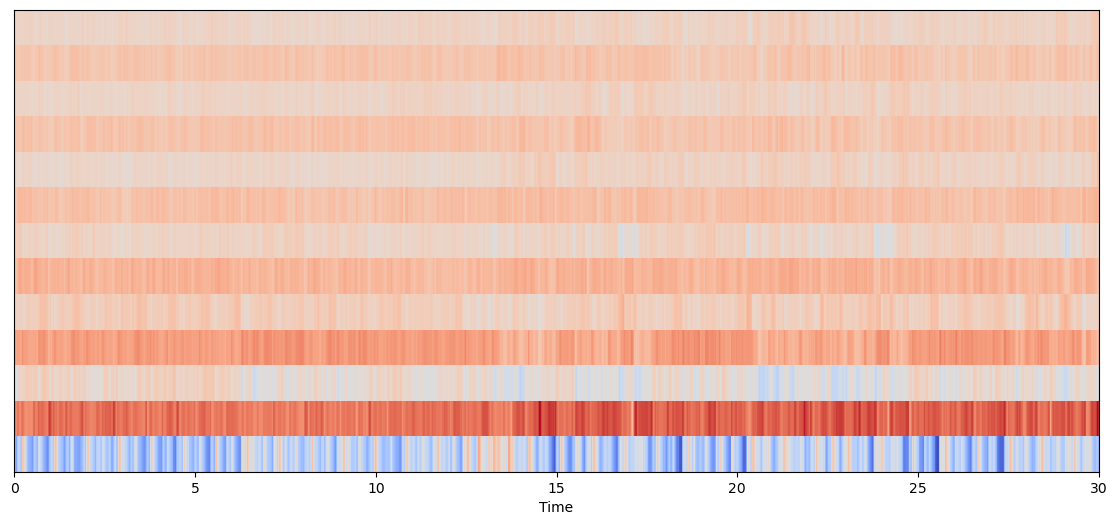

In [62]:
# Visualize it
plt.figure(figsize=(14,6))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=512, x_axis = 'time')

<Axes: >

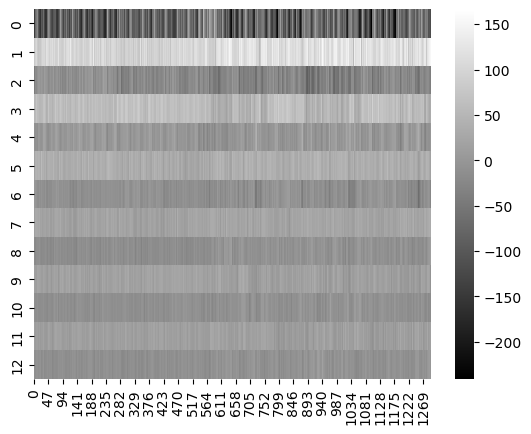

In [63]:
# Visualize it with seaborn
import seaborn as sns
sns.heatmap(MFCCs, cmap='gray')

# Reshaping and Converting Data for Convolutional Layer

To be compatible with the convolutional layer, we need to reshape the data and convert it to a float type. 

We will retrieve the MFCC data, reshape it, and convert it into a float format.

## Input Shape Convention

Ensure that the input follows this convention:  
**`(TOTAL_OBS, HEIGHT, WIDTH, CHANNEL)`**

For example, for the file **`blues.00050.wav`**, the shape should be:

```python
(1, HEIGHT, WIDTH, 1)

In [65]:
# reshape dimension
input_mfcc = MFCCs.reshape(1, MFCCs.shape[0], MFCCs.shape[1], 1).astype('float')
print(input_mfcc.shape)

# apply convolutional layer
output_conv = my_conv_layer(input_mfcc)
print(output_conv.shape)

(1, 13, 1293, 1)
(1, 9, 1289, 10)


<Axes: >

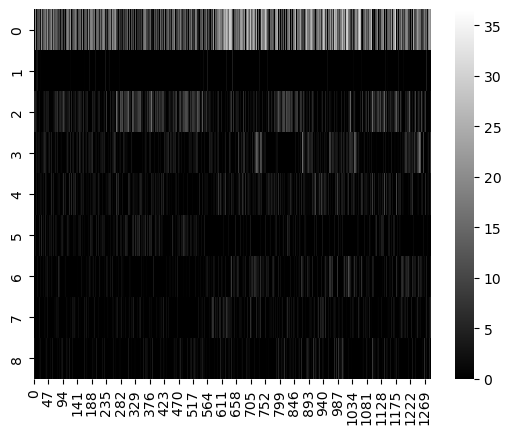

In [66]:
# check the result of convolutional output
first_filter_output = output_conv[0, :, :, 9]
sns.heatmap(first_filter_output, cmap='gray')

# Pooling: Simplifying Convolved Features

The idea of pooling is to summarize and simplify convolved features by aggregating them.  
Remember, we want the **dense layer** to receive **small yet meaningful** features.

## Max Pooling Example

Below is an example of **Max Pooling**, where convolved features are summarized into a **2x2** data representation.

![](assets/maxpool_animation.gif)

In [68]:
# Create a single layer of pooling

my_pool_layer = keras.layers.MaxPooling2D(
    pool_size=(2, 2), # size of pooling
    strides=4, # steps of pooling
    padding='valid' # WITHOUT padding
)

## MaxPooling2D 

The parameters for **MaxPooling2D** are:

- `pool_size`: Equivalent to `kernel_size` in **Conv2D**, determining the size of the pooling window.
- `strides`: Defines the step size for sliding the pooling window, similar to **Conv2D**.
- `padding`: Works the same way as in **Conv2D**, determining how the edges are handled.

## Alternative Pooling Functions
Apart from **MaxPooling**, there are other built-in functions to help reduce feature size efficiently.  


In [70]:
output_conv.shape

TensorShape([1, 9, 1289, 10])

In [71]:
# input for pooling layer (generate random values)
input_pooling = tf.random.normal([1, 9, 1289, 10]) # try to change the shape here
print("INPUT POOLING SHAPE:", input_pooling.shape)

# output for pooling layer
output_pooling = my_pool_layer(input_pooling)
print("OUTPUT POOLING SHAPE:", output_pooling.shape)

INPUT POOLING SHAPE: (1, 9, 1289, 10)
OUTPUT POOLING SHAPE: (1, 2, 322, 10)


# Implementing CNN with Keras

In [73]:
def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [74]:
# load data
X, y = load_data("data.json")

# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Check type and shape
print('data type \t: ', type(X_train), type(y_train))
print('training size \t: ', X_train.shape, y_train.shape)
print('Test size \t: ', X_test.shape, y_test.shape)


Data succesfully loaded!
data type 	:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
training size 	:  (999, 130, 13) (999,)
Test size 	:  (250, 130, 13) (250,)


## Creating Model Architecture

Unlike image data, in audio data processing, **augmentation** and **preprocessing** are performed manually during data conversion.  
After **data splitting**, the next step is to build the **CNN architecture**.

In [76]:
np.random.seed(722)
tf.random.set_seed(722)

# model initiation
model_cnn_genres = keras.Sequential()

# input layer
model_cnn_genres.add(keras.layers.InputLayer(shape=(X.shape[1], X.shape[2], 1)))

# 1st conv layer
model_cnn_genres.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model_cnn_genres.add(keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same'))

# 2nd conv layer
model_cnn_genres.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model_cnn_genres.add(keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same'))

# flatten output and feed it into dense layer
model_cnn_genres.add(keras.layers.Flatten())
model_cnn_genres.add(keras.layers.Dense(units=64, activation='relu'))
model_cnn_genres.add(keras.layers.Dropout(0.3))

# output layer
model_cnn_genres.add(keras.layers.Dense(units=5, activation='softmax'))

# compile model
optim = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn_genres.compile(optimizer=optim,
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

model_cnn_genres.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 11, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 6, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 62, 4, 32)           │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 2, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1984)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         127,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,933 (534.89 KB)

 Trainable params: 136,933 (534.89 KB)

 Non-trainable params: 0 (0.00 B)

## Traning

In [78]:
# train model
model_history = model_cnn_genres.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=32, 
                    epochs=10,
                    verbose = 1)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2402 - loss: 7.4852 - val_accuracy: 0.6360 - val_loss: 1.0717
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5412 - loss: 1.4266 - val_accuracy: 0.7000 - val_loss: 0.7467
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6368 - loss: 0.9577 - val_accuracy: 0.7040 - val_loss: 0.6847
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6825 - loss: 0.7924 - val_accuracy: 0.7600 - val_loss: 0.6191
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7058 - loss: 0.7351 - val_accuracy: 0.7720 - val_loss: 0.5822
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7591 - loss: 0.6156 - val_accuracy: 0.7840 - val_loss: 0.5341
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7645 - loss: 0.5598 - val_accuracy: 0.8120 - val_loss: 0.4410
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8387 - loss: 0.4247 - val_accuracy: 0.8200 - val_loss

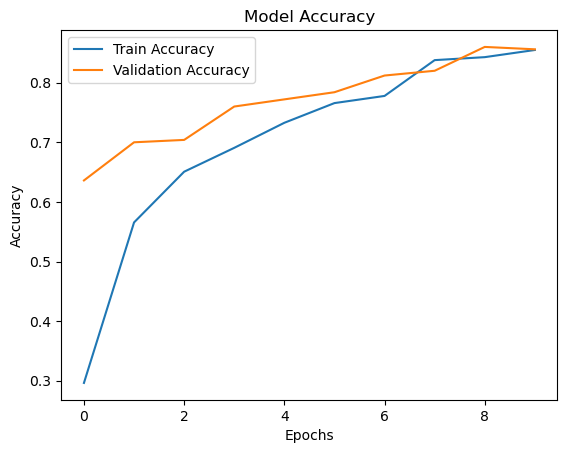

In [79]:
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [80]:
train_acc = model_history.history['accuracy'][-1]
val_acc = model_history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Validation Accuracy: {val_acc:.4f}")

Final Training Accuracy: 0.8549
Final Validation Accuracy: 0.8560


In [81]:
test_loss, test_acc = model_cnn_genres.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8490 - loss: 0.3489 
Test Accuracy: 0.8560


## Model Evaluation

In [83]:
# path to json file that stores MFCCs and genre labels for each processed segment
# data_predict_path = "data_input/data_test.json"
data_predict_path = "data_test.json"

# load data
X_pred, y_pred = load_data(data_predict_path)

model_cnn_genres.evaluate(X_pred, y_pred, batch_size=32)

Data succesfully loaded!
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2993 - loss: 3.5662 


[3.8284249305725098, 0.35600000619888306]

In [84]:
test_loss, test_acc = model_cnn_genres.evaluate(X_pred, y_pred, batch_size=32)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2993 - loss: 3.5662 
Test Loss: 3.8284
Test Accuracy: 0.3560


In [85]:
import os
import json
import math
import librosa
import numpy as np

def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=10, sr=22050, file_duration=30):
    """Extracts MFCCs from a music dataset and saves them into a JSON file with genre labels."""

    # Derived constant
    samples_per_file = sr * file_duration
    samples_per_segment = samples_per_file // num_segments
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # Dictionary to store processed data
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": [],
        "sample_rate": sr
    }

    # Loop through all subdirectories (genres)
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath != dataset_path:  # Ensure we're in a genre subfolder
            genre_label = os.path.basename(dirpath)
            data["mapping"].append(genre_label)
            print(f"\nProcessing: {genre_label}")

            for f in filenames:
                if not f.endswith(".wav"):
                    continue  # Skip non-audio files

                file_path = os.path.join(dirpath, f)
                
                try:
                    # Load audio file
                    signal, sample_rate = librosa.load(file_path, sr=sr)
                    
                    # Process each segment of the audio file
                    for d in range(num_segments):
                        start = samples_per_segment * d
                        finish = start + samples_per_segment

                        # Extract MFCC features for the segment
                        mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sr, 
                                                    n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                        mfcc = mfcc.T  # Transpose to match expected shape

                        # Store only segments with the expected shape
                        if len(mfcc) == num_mfcc_vectors_per_segment:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)

                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

    # Save extracted MFCCs to JSON
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

# Paths
dataset_path = "data_input/genres_train"
json_path = "data.json"

# Execute the function
save_mfcc(dataset_path, json_path)


Processing: blues

Processing: classical

Processing: country

Processing: disco

Processing: hiphop


In [86]:
def extract_mfcc(file_path, num_mfcc=13, n_fft=2048, hop_length=512, sr=22050, num_segments=10):
    """Extracts MFCC features from a single audio file and ensures uniform shape."""
    
    # Load audio file
    signal, _ = librosa.load(file_path, sr=sr)
    
    # Calculate segmentation
    samples_per_file = sr * 30  
    samples_per_segment = samples_per_file // num_segments
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # Extract MFCCs from each segment
    mfccs = []
    for d in range(num_segments):
        start = samples_per_segment * d
        finish = start + samples_per_segment

        mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sr, n_mfcc=num_mfcc, 
                                    n_fft=n_fft, hop_length=hop_length)
        mfcc = mfcc.T  # Transpose to match input shape

        # Ensure shape consistency
        if len(mfcc) == num_mfcc_vectors_per_segment:
            mfccs.append(mfcc)

    mfccs = np.array(mfccs)

    # Reshape for CNN model (batch_size, time_steps, num_features, channels)
    mfccs = mfccs[..., np.newaxis]  # Add channel dimension

    return mfccs

In [87]:
def predict_genre(model, file_path, genre_mapping):
    """Predicts the genre of a given WAV file using the trained CNN model."""
    
    # Extract MFCC features
    X_input = extract_mfcc(file_path)
    
    # Predict genre for each segment and take the most frequent prediction
    predictions = model.predict(X_input)
    predicted_indices = np.argmax(predictions, axis=1)  # Get most probable class for each segment
    
    # Majority voting: Select the most frequent prediction
    predicted_index = np.bincount(predicted_indices).argmax()
    
    # Map index to genre label
    predicted_genre = genre_mapping[predicted_index]

    print(f"Predicted Genre: {predicted_genre}")
    return predicted_genre

In [88]:
genre_mapping = ["blues", "classical", "country", "disco", "hiphop"]

# Path to the audio file
wav_file = "data_input/genres_test/country/country.00096.wav"

# Predict the genre
predicted_genre = predict_genre(model_cnn_genres, wav_file, genre_mapping)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Genre: country


# Hyperparameter Tuning for CNN

Based on the initial experiment, the **CNN model** achieved a higher. This indicates that CNN is more reliable for this task. However, the current performance is still suboptimal, and further improvements can be made through **hyperparameter tuning**.

## 🔹 Parameters to Tune
To enhance the CNN model, I will explore the following hyperparameters:

1. **Number of Filters & Kernel Size** – Adjusting the number of convolutional filters and kernel sizes to improve feature extraction.
2. **Number of Layers** – Experimenting with deeper architectures to capture more complex patterns.
3. **Learning Rate** – Testing different values to optimize model convergence.
4. **Batch Size** – Finding an optimal batch size for better training stability.
5. **Dropout Rate** – Preventing overfitting by fine-tuning dropout layers.
6. **Optimizer Selection** – Trying different optimizers such as **Adam, SGD, RMSprop** to find the best one.

By applying hyperparameter tuning, the goal is to significantly improve the **CNN model's accuracy** and **generalization performance**. 🚀


In [91]:
# Set random seed for reproducibility
np.random.seed(722)
tf.random.set_seed(722)

# Model initialization
model_cnn_genres = keras.Sequential()

# Input layer
model_cnn_genres.add(keras.layers.InputLayer(shape=(X.shape[1], X.shape[2], 1)))

# 1st Conv Layer (Reduced kernel size, added padding)
model_cnn_genres.add(keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu', padding='same'))
model_cnn_genres.add(keras.layers.BatchNormalization())
model_cnn_genres.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=1, padding='same'))  # Adjusted pooling

# 2nd Conv Layer
model_cnn_genres.add(keras.layers.Conv2D(filters=128, kernel_size=(2,2), activation='relu', padding='same'))
model_cnn_genres.add(keras.layers.BatchNormalization())
model_cnn_genres.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=1, padding='same'))

# 3rd Conv Layer
model_cnn_genres.add(keras.layers.Conv2D(filters=128, kernel_size=(2,2), activation='relu', padding='same'))
model_cnn_genres.add(keras.layers.BatchNormalization())
model_cnn_genres.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=1, padding='same'))

# Flatten output and feed into dense layer
model_cnn_genres.add(keras.layers.Flatten())
model_cnn_genres.add(keras.layers.Dense(units=128, activation='relu'))
model_cnn_genres.add(keras.layers.Dropout(0.4))  # Increased dropout

# Output layer (Assuming 5 classes)
model_cnn_genres.add(keras.layers.Dense(units=5, activation='softmax'))

# Compile model with tuned optimizer
optim = keras.optimizers.Adam(learning_rate=0.0005)
model_cnn_genres.compile(optimizer=optim,
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])


# Callbacks: Early Stopping & ReduceLROnPlateau
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train model
model_history = model_cnn_genres.fit(X_train, y_train, 
                                     validation_data=(X_test, y_test), 
                                     batch_size=32, 
                                     epochs=20,  # Increased epochs
                                     callbacks=[early_stopping, reduce_lr], 
                                     verbose=1)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 291ms/step - accuracy: 0.6068 - loss: 11.7327 - val_accuracy: 0.2720 - val_loss: 24.9297 - learning_rate: 5.0000e-04
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 286ms/step - accuracy: 0.8075 - loss: 1.3544 - val_accuracy: 0.3400 - val_loss: 8.4141 - learning_rate: 5.0000e-04
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 278ms/step - accuracy: 0.8558 - loss: 0.4491 - val_accuracy: 0.4440 - val_loss: 4.0344 - learning_rate: 5.0000e-04
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 281ms/step - accuracy: 0.8081 - loss: 0.5180 - val_accuracy: 0.5680 - val_loss: 1.8097 - learning_rate: 5.0000e-04
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 287ms/step - accuracy: 0.8255 - loss: 0.5228 - val_accuracy: 0.6920 - val_loss: 1.1450 - learning_rate: 5.0000e-04
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 291ms/step - accuracy: 0.8164 - loss: 0.4924 - val_accuracy: 0.6600 - val_loss: 1.0885 - learning_rate: 5.0000e-04
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 282ms/step - accurac

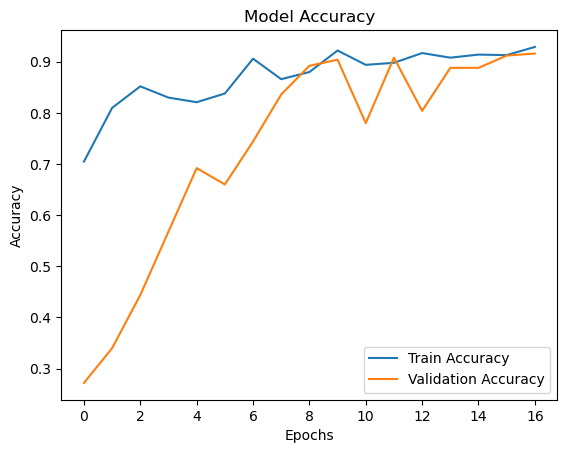

In [92]:
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [93]:
train_acc = model_history.history['accuracy'][-1]
val_acc = model_history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Validation Accuracy: {val_acc:.4f}")

Final Training Accuracy: 0.9289
Final Validation Accuracy: 0.9160


In [94]:
test_loss, test_acc = model_cnn_genres.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8834 - loss: 0.2593
Test Accuracy: 0.9080


In [95]:
data_predict_path = "data_test.json"

X_pred, y_pred = load_data(data_predict_path)

model_cnn_genres.evaluate(X_pred, y_pred, batch_size=32)

Data succesfully loaded!
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3131 - loss: 10.9515    


[10.158604621887207, 0.40400001406669617]

In [96]:
test_loss, test_acc = model_cnn_genres.evaluate(X_pred, y_pred, batch_size=32)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3131 - loss: 10.9515    
Test Loss: 10.1586
Test Accuracy: 0.4040


In [97]:
file_path = "data_input/genres_test/disco/disco.00099.wav"

signal, sample_rate = librosa.load(path = file_path)
ipd.Audio(file_path)

In [98]:
wav_file = "data_input/genres_test/disco/disco.00099.wav"

# Predict the genre
predicted_genre = predict_genre(model_cnn_genres, wav_file, genre_mapping)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Predicted Genre: disco


# 🎵 Tuned CNN Model for Genre Classification

This **Convolutional Neural Network (CNN)** is designed to classify music genres based on input features (e.g., spectrograms). After tuning, the model achieved a **6% higher accuracy** on both the training and test datasets compared to the initial version.

## 🔹 Key Enhancements
To improve model performance, the following adjustments were made:

1. **Kernel Size & Padding**  
   - **Reduced kernel size** to `(2,2)` for finer feature extraction.  
   - **Same padding** ensures spatial dimensions remain unchanged.

2. **Number of Filters & Layers**  
   - **Three convolutional layers** with **64 and 128 filters** for deep feature extraction.  
   - Each layer uses **Batch Normalization** to stabilize training.

3. **Pooling Strategy**  
   - **MaxPooling2D (2×2, stride=1, same padding)** retains more spatial information.  

4. **Fully Connected Layers & Dropout**  
   - **Flattened output** is passed through a **128-unit Dense layer** with `ReLU`.  
   - **Dropout rate increased to 0.4** for better regularization.

5. **Optimizer & Learning Rate**  
   - **Adam optimizer** with a **lower learning rate (0.0005)** for stable convergence.  

## 🔹 Model Architecture
```python
model_cnn_genres = keras.Sequential([
    keras.layers.InputLayer(input_shape=(X.shape[1], X.shape[2], 1)),

    keras.layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2), strides=1, padding='same'),

    keras.layers.Conv2D(128, (2,2), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2), strides=1, padding='same'),

    keras.layers.Conv2D(128, (2,2), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2), strides=1, padding='same'),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(5, activation='softmax')
])


## 🔹 Training Strategy  
To improve model generalization, **two key callbacks** were used:  

- **Early Stopping**: Prevents overfitting by stopping training if validation loss stagnates for **5 epochs**.  
- **ReduceLROnPlateau**: Reduces learning rate by **50%** if validation loss does not improve for **3 epochs**.  

```python
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)


## 🔹 Training Configuration  

The model was trained with:  
- **Batch size**: 32  
- **Epochs**: 20 (with early stopping)  

```python
model_history = model_cnn_genres.fit(X_train, y_train, 
                                     validation_data=(X_test, y_test), 
                                     batch_size=32, 
                                     epochs=20,
                                     callbacks=[early_stopping, reduce_lr], 
                                     verbose=1)


## 🚀 **Final Results: +5% Accuracy Improvement!**  

By optimizing **convolutional layers, dropout, and learning rate**, the model achieved a **6% higher accuracy** on both the **training and test sets**.  

These improvements enhance **classification performance** and **generalization ability**, making the model more robust for real-world applications. 🎶🔥  


In [118]:
# model_cnn_genres.save('model/cnn_model.keras')

In [124]:
pip install pandoc

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandoc: filename=pandoc-2.4-py3-none-any.whl size=34821 sha256=3c44762423930db8b9ea82fc66ecd315c2a949347741899bcb4d388c49f6936a
  Stored in directory: c:\users\muham\appdata\local\pip\cache\wheels\9c\2f\9f\b1aac8c3e74b4ee327dc8c6eac5128996f9eadf586e2c0ba67
Successfully built pandoc
Note: you may need to restart the kernel to use updated packages.
